In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

from datetime import datetime, timedelta

In [2]:
date_1 = '2019-08-01'
date_2 = '2020-08-01'

In [4]:
date_1_c = pd.Timestamp(date_1)
date_2_c = pd.Timestamp(date_2)

In [19]:
iv = pd.date_range(date_1_c, 
                   date_2_c, 
                   freq='W-SUN', 
                   closed='right')

In [20]:
len(iv)

52

In [21]:
iv

DatetimeIndex(['2019-08-04', '2019-08-11', '2019-08-18', '2019-08-25',
               '2019-09-01', '2019-09-08', '2019-09-15', '2019-09-22',
               '2019-09-29', '2019-10-06', '2019-10-13', '2019-10-20',
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01', '2019-12-08', '2019-12-15',
               '2019-12-22', '2019-12-29', '2020-01-05', '2020-01-12',
               '2020-01-19', '2020-01-26', '2020-02-02', '2020-02-09',
               '2020-02-16', '2020-02-23', '2020-03-01', '2020-03-08',
               '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26'],
              dtype='datetime64[ns]', freq='W-SUN')

In [22]:
df = pd.DataFrame()

In [24]:
df['date'] = iv

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    52 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 544.0 bytes


In [46]:
# Function to pull economic data from Statistics Canada

from stats_can import StatsCan

# sc = StatsCan()
# econ_df = sc.vectors_to_df_remote('v2062815', periods = 360)
# econ_df.columns = ['unemployment_rate']
# econ_df = econ_df.reset_index()

# econ_df['refPer_yr_mth'] = [item for item in zip(econ_df['refPer'].dt.year, econ_df['refPer'].dt.month)]
    
# df['date_row_yr_mth'] = [item for item in zip(df['date'].dt.year, df['date'].dt.month)]

# data_vectors_dict = {'Monthly GDP Growth Rate (Annualised)': 'v65201210', 
#                      'Monthly Inflation Rate (Annualised)': 'v41690973', 
#                      'Unemployment Rate':'v2062815'}

def append_monthly_unemployment_rate(df, date_row):
    sc = StatsCan() # Instantiate StatsCan object
    econ_df = sc.vectors_to_df_remote('v2062815', periods = 360) # Pull monthly unemployment rate
    econ_df.columns = ['unemployment_rate']
    econ_df = econ_df.reset_index()
    
    # 
    econ_df['refPer_yr_mth'] = [item for item in zip(econ_df['refPer'].dt.year, econ_df['refPer'].dt.month)]
    
    df['date_row_yr_mth'] = [item for item in zip(df[date_row].dt.year, df[date_row].dt.month)]
    
    df_merge_orig_gdp = pd.merge(df, 
                                econ_df, 
                                how = 'left', 
                                left_on='date_row_yr_mth', 
                                right_on='refPer_yr_mth')
    
    df_merge_orig_gdp = df_merge_orig_gdp.loc[:,['date', 'unemployment_rate']]
    
    return df_merge_orig_gdp


In [41]:
pd.merge(df, 
         econ_df, 
         how = 'left', 
         left_on='date_row_yr_mth', 
         right_on='refPer_yr_mth') 

,date,date_row_yr_mth,refPer,unemployment_rate,refPer_yr_mth
0,2019-08-04,"(2019, 8)",2019-08-01,5.8,"(2019, 8)"
1,2019-08-11,"(2019, 8)",2019-08-01,5.8,"(2019, 8)"
2,2019-08-18,"(2019, 8)",2019-08-01,5.8,"(2019, 8)"
3,2019-08-25,"(2019, 8)",2019-08-01,5.8,"(2019, 8)"
4,2019-09-01,"(2019, 9)",2019-09-01,5.6,"(2019, 9)"
5,2019-09-08,"(2019, 9)",2019-09-01,5.6,"(2019, 9)"
6,2019-09-15,"(2019, 9)",2019-09-01,5.6,"(2019, 9)"
7,2019-09-22,"(2019, 9)",2019-09-01,5.6,"(2019, 9)"
8,2019-09-29,"(2019, 9)",2019-09-01,5.6,"(2019, 9)"
9,2019-10-06,"(2019, 10)",2019-10-01,5.6,"(2019, 10)"


In [48]:
df = append_monthly_unemployment_rate(df, 'date')

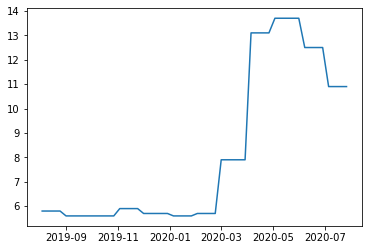

In [53]:
pp.plot(df['date'], df['unemployment_rate'])

In [55]:
def make_dataframe(start_date, end_date, include_unemployment_rate=True):
        '''
        To-do: When function is called, creates an Pandas dataframe with a date column. 
        '''
        start_date_ts = pd.Timestamp(start_date)
        end_date_ts = pd.Timestamp(end_date)

        df = pd.DataFrame()
        df['date'] = pd.date_range(start_date_ts, end_date_ts, freq = 'W-SUN', closed = 'right')

        if include_unemployment_rate:
            sc = StatsCan()
            unem_df = sc.vectors_to_df_remote('v2062815', periods = 360)
            unem_df.columns = ['unemployment_rate']
            unem_df = unem_df.reset_index()

            unem_df['refPer_yr_mth'] = [item for item in zip(unem_df['refPer'].dt.year, unem_df['refPer'].dt.month)]
        
            df['date_row_yr_mth'] = [item for item in zip(df['date'].dt.year, df['date'].dt.month)]
        
            df_merge_orig_gdp = pd.merge(df, 
                                    unem_df, 
                                    how = 'left', 
                                    left_on='date_row_yr_mth', 
                                    right_on='refPer_yr_mth')
        
            df_merge_orig_gdp = df_merge_orig_gdp.loc[:,['date', 'unemployment_rate']]

            return df_merge_orig_gdp

        else:
            return df

In [57]:
make_dataframe(date_1, date_2, include_unemployment_rate=False)

,date
0,2019-08-04
1,2019-08-11
2,2019-08-18
3,2019-08-25
4,2019-09-01
5,2019-09-08
6,2019-09-15
7,2019-09-22
8,2019-09-29
9,2019-10-06
